<a href="https://colab.research.google.com/github/bindubritta/STAT5320/blob/main/PLSLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Partial Least-Squares Logit Regression (PLSLR)

In [1]:
## Open CSV dataset from GitHub
import pandas as pd

url = 'https://raw.githubusercontent.com/bindubritta/Unraveling-Multicollinearity-between-Predictors-with-PCLR-and-PLSLR-Techniques/main/Leukemia_Dataset.csv'
dataFrame = pd.read_csv(url)
# print(dataFrame.head(5))
dataFrame

,Samples,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,...,Gene_3563,Gene_3564,Gene_3565,Gene_3566,Gene_3567,Gene_3568,Gene_3569,Gene_3570,Gene_3571,Response
0,1,-0.788350,-0.756913,-1.414095,-0.718028,0.473398,3.113805,2.749407,2.628862,3.146849,...,-0.660664,-0.277515,-0.190609,1.096830,0.069212,-0.178846,0.468823,-0.331179,-0.825661,Normal
1,2,-1.335163,-1.335163,-1.335163,-1.205542,-0.055226,0.251215,-1.213103,1.040300,3.097184,...,-0.756412,-0.670722,-0.603962,0.263903,0.520380,-0.037259,0.461020,-0.390380,-1.335163,Normal
2,3,-1.423499,-1.423499,-1.389461,-0.069438,0.911507,2.080529,1.603549,1.702697,2.980989,...,-0.487601,-0.091597,0.289707,0.328599,0.732303,-0.973264,0.686988,0.355827,-0.708238,Normal
3,4,-0.941616,-1.362703,-1.362703,-0.959263,-0.052647,2.210509,1.520901,1.625528,3.244964,...,-1.135454,-0.230745,-0.330132,0.483504,0.590966,-0.852819,0.327239,-0.874228,-1.149951,Normal
4,5,-1.373415,-0.527130,-1.373415,-1.191340,0.068572,0.963808,1.654828,-0.319909,3.193077,...,-1.373415,-0.948803,-0.845447,0.306028,0.339066,0.107542,-0.534426,-0.325722,-1.373415,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,-1.069315,0.490642,-1.362381,-0.837656,0.290049,-1.362381,-1.362381,-1.362381,2.966510,...,-0.709472,-0.745946,-1.106406,0.673558,0.076040,0.663305,0.050385,-0.584246,-1.362381,Normal
68,69,-1.422469,-1.422469,0.157955,0.121096,0.957790,-1.422469,-1.422469,-1.422469,3.025302,...,-0.937056,-0.486363,-0.615953,0.745703,0.172275,0.329213,0.333950,-0.677415,-1.346944,Normal
69,70,-1.041304,0.066865,-1.041304,-0.680756,-0.040154,3.177571,2.530065,2.983361,3.502013,...,-1.041304,-1.041304,-0.581682,1.154342,0.060892,-0.203257,0.066865,-0.513601,-0.502712,Normal
70,71,-1.210655,-0.834006,-1.210655,-0.920232,0.409746,-1.210655,-1.210655,-1.210655,2.707367,...,-0.720648,-0.428079,-0.614412,1.349644,0.704953,-0.551259,-0.032819,-0.518925,-1.210655,Normal


In [2]:
## Processing dataset for Latent Variables or PLS Components Analysis
# Dummy variables to represent categorical data as numeric (Normal = 0 and Tumor = 1)
dataFrame['Dummy_Response'] = pd.get_dummies(dataFrame['Response']).iloc[:,1]
# Removing columns 'Samples' and 'Response" as not needed for analysis
dataFrame = dataFrame.drop(columns = ['Samples', 'Response'])
# Split the dataset into X and y
y = dataFrame.pop('Dummy_Response')
X = dataFrame

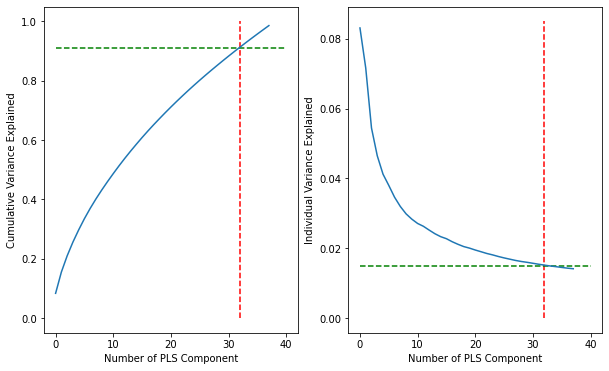

In [3]:
## Finding the optimum number of Latent Variable Components based on the retained information
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

# maxLength = X.shape[1]+1
maxLength = 39
iVariance = [0 for i in range(maxLength)]
totalVariance = 0

for i in range(maxLength):
  pls = PLSRegression(n_components = i+1)
  X_pls = pls.fit_transform(X, y)[0]
  iVariance[i] = np.var(X_pls)
  with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category = DeprecationWarning)    
  totalVariance = totalVariance + iVariance[i]
  
fracVariance = [0 for j in range(i)]
indvVariance = [0 for j in range(i)]
for j in range(i):
  indvVariance[j] = iVariance[j] / totalVariance
  if j < 1:
    fracVariance[j] = indvVariance[j]
  else:
    fracVariance[j] = fracVariance[j-1] + indvVariance[j]

plt.figure(figsize = [10,6])
## Placing the plots in the plane
plot1 = plt.subplot2grid((1, 2), (0, 0), rowspan = 1, colspan = 1)
plot2 = plt.subplot2grid((1, 2), (0, 1), rowspan = 1, colspan = 1)

## Plot 1: Explained Total Variance Vs No. of PLS Component
plot1.plot(fracVariance)
# plot1.set_title('Explained Variance Ratio for PLS')
plot1.set_xlabel('Number of PLS Component')
plot1.set_ylabel('Cumulative Variance Explained')
plot1.vlines(x = 32, ymax = 1, ymin = 0, colors = "r", linestyles = "--")
plot1.hlines(y = 0.91, xmax = 40, xmin = 0, colors = "g", linestyles = "--")

## Plot 2: Explained Variance Vs PLS Component
plot2.plot(indvVariance)
# plot1.set_title('Explained Variance Ratio for PLS')
plot2.set_xlabel('Number of PLS Component')
plot2.set_ylabel('Individual Variance Explained')
plot2.vlines(x = 32, ymax = 0.085, ymin = 0, colors = "r", linestyles = "--")
plot2.hlines(y = 0.015, xmax = 40, xmin = 0, colors = "g", linestyles = "--")

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 39
  warnings.warn(f"Y residual is constant at iteration {k}")

In [4]:
## Training the PLA Model with 32 PLS Components
plsFinalModel = PLSRegression(n_components = 32)
dataFrameXplsFinal = plsFinalModel.fit_transform(X, y)[0]

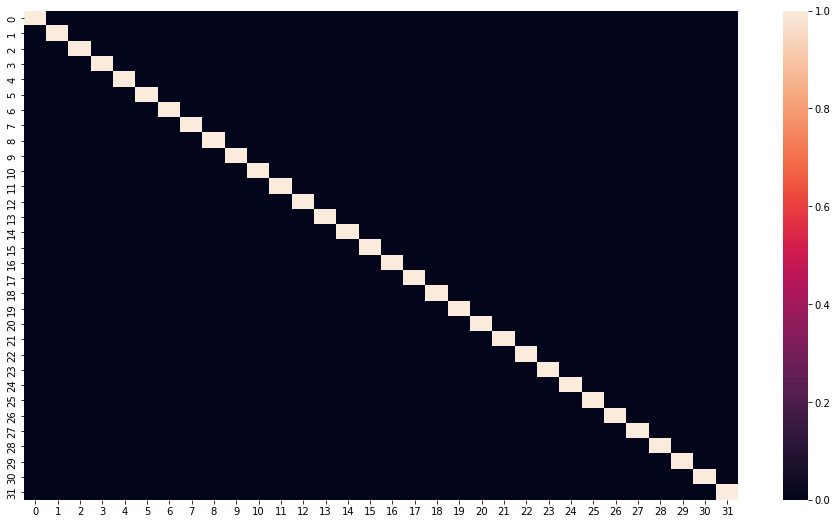

In [5]:
## Checking the correlations among 32 PLS Components
import seaborn as sns

corrMatrix = np.corrcoef(dataFrameXplsFinal.transpose())
plt.figure(figsize = [16,9])
sns.heatmap(corrMatrix, annot = False)
plt.show()

In [6]:
## Splitting the data into training and test data set
from sklearn.model_selection import train_test_split 
XTrain, XTest, yTrain, yTest = train_test_split(dataFrameXplsFinal,y, train_size = 0.75,
                                test_size = 0.25, shuffle = True, random_state = 1)

In [7]:
## Training the Logistic Regression model with PLS
from sklearn.linear_model import LogisticRegression

logPLSLearner = LogisticRegression()
logPLSModel = logPLSLearner.fit(XTrain, yTrain)

In [8]:
## Calculating the Area Under the Curve (AUC)
from sklearn.metrics import roc_auc_score

predTest = logPLSModel.predict_proba(XTest)
"{:2.2}".format(roc_auc_score(yTest, predTest[:,1]))

'1.0'

In [9]:
## Testing the Logistic Regression model with PLS

# Calculating the predicted probabilities and converting to dataframe
yPred = logPLSModel.predict_proba(XTest)
yPredDataFrame = pd.DataFrame(yPred)
yPredOne = yPredDataFrame.iloc[:,[1]]

# Converting yTest to dataframe with columns ID
yTestDataFrame = pd.DataFrame(yTest)

In [10]:
# Re-inserting the column 'Samples' from test data index and then arranging the yPredictFinal dataframe
yTestDataFrame['Samples'] = yTestDataFrame.index
yTestDataFrame = yTestDataFrame[['Samples', 'Dummy_Response']]
yPredOne.reset_index(drop = True, inplace = True)
yTestDataFrame.reset_index(drop = True, inplace = True)
yPredFinal = pd.concat([yTestDataFrame, yPredOne], axis = 1)
yPredFinal = yPredFinal.rename(columns = { 1 : "Yes_Prob", "target_variable" : "Yes" } )
yPredFinal = yPredFinal.reindex(["Samples", "Dummy_Response", "Yes_Prob"], axis = 1)

# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    yPredFinal[i] = yPredFinal.Yes_Prob.map(lambda x: 1 if x > i else 0)

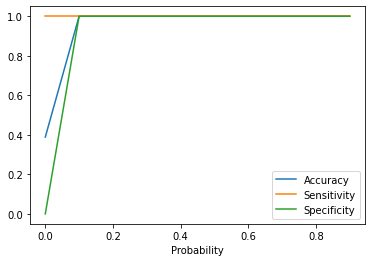

In [11]:
# Calculating accuracy, sensitivity and specificity for different cutoff points
from sklearn.metrics import confusion_matrix

Probability = pd.DataFrame( columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in numbers:
    confMatrix = confusion_matrix(yPredFinal.Dummy_Response, yPredFinal[i] )
    Total = sum(sum(confMatrix))
    Accuracy    = (confMatrix[0,0] + confMatrix[1,1])/Total
    Sensitivity = confMatrix[1,1]/(confMatrix[1,1] + confMatrix[1,0])
    Specificity = confMatrix[0,0]/(confMatrix[0,0] + confMatrix[0,1])
    Probability.loc[i] =[ i, Accuracy, Sensitivity, Specificity]
Probability.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

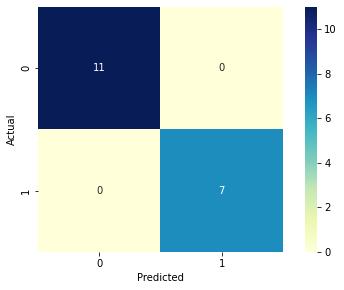

In [12]:
## Confusion matrix for probability cutoff point = 0.5
yPredFinal['predicted'] = yPredFinal.Yes_Prob.map(lambda x: 1 if x > 0.5 else 0)
confMatrixFinal = confusion_matrix(yPredFinal.Dummy_Response, yPredFinal.predicted)
Probability[Probability["Probability"]==0.5]

plt.figure(figsize=(8,4.5))
sns.heatmap(confMatrixFinal, vmin=None, vmax=None, cmap="YlGnBu", center=None,
           robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=0,
           linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None,
           square=True, xticklabels='auto', yticklabels='auto',
           mask=None, ax=None)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
## Classification report for the PLSLR model
from sklearn.metrics import classification_report

clfReport = classification_report(yPredFinal.Dummy_Response, yPredFinal.predicted,
              labels=None, target_names=None, sample_weight=None, digits=2,
              output_dict=False, zero_division="warn")
print(clfReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

